In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


# Notebook configuration

In [54]:
timing = False

# Core functions

In [55]:
class Geometry:
    def __init__(self, r, nsipm):
        self.r     = r
        self.r2    = 2*r
        self.nsipm = nsipm

        self.x     = np.linspace(-r, r, nsipm)
        self.y     = np.linspace(-r, r, nsipm)
        self.z     = np.linspace(-r, r, nsipm)

        self.xz    = np.meshgrid(self.x, self.z)
        self.yz    = np.meshgrid(self.y, self.z)

        self.bins  = np.linspace(-r, r, nsipm+1), np.linspace(-r, r, nsipm+1)
        self.axis  = np.linspace(-r, r, 100)
        self.zero  = np.zeros_like(self.axis)


class Event:
    def __init__(self, x, y, z, xz, yz):
        self.x  = x
        self.y  = y
        self.z  = z
        self.xz = xz.T
        self.yz = yz.T

    def data(self):
        return np.concatenate([self.xz.flat, self.yz.flat])

default_geometry = Geometry(1, 5)

lmap  = lambda *args: list(map(*args))
npmap = lambda *args: np.array(lmap(*args))


def timefunc(do_time):
    def decorator(f):
        if not do_time:
            return f
        def timed_func(*args, **kwargs):
            t0  = time.time()
            out = f(*args, **kwargs)
            t1  = time.time()
            print(t1-t0)
            return out
        return timed_func
    return decorator

def to_cartesian(r, theta, phi, x0=0, y0=0, z0=0):
    x = x0 + r * np.sin(theta) * np.cos(phi)
    y = y0 + r * np.sin(theta) * np.sin(phi)
    z = z0 + r * np.cos(theta)
    return x, y, z


def get_signal(geometry=default_geometry):
    return lambda var, z: np.histogram2d(var, z, geometry.bins)[0].astype(bool)


@timefunc(timing)
def get_events(geometry=default_geometry, N=1000, random_offset=False):
    theta  = np.arccos(2 * np.random.rand(N) - 1)
    phi    = 2 * np.pi   * np.random.rand(N)

    x0, y0, z0 = np.random.uniform(-geometry.r, geometry.r, size=(3,N)) if random_offset else (0, 0, 0)
    x1, y1, z1 = to_cartesian(geometry.r2,         theta,         phi, x0, y0, z0)
    x2, y2, z2 = to_cartesian(geometry.r2, np.pi - theta, np.pi + phi, x0, y0, z0)
    
    x = lmap(np.linspace, x1, x2, np.full_like(x1, 100))
    y = lmap(np.linspace, y1, y2, np.full_like(y1, 100))
    z = lmap(np.linspace, z1, z2, np.full_like(z1, 100))

    xz = lmap(get_signal(geometry), x, z)
    yz = lmap(get_signal(geometry), y, z)
    return lmap(Event, x, y, z, xz, yz)


@timefunc(timing)
def get_event(*args, **kwargs):
    return get_events(*args, N=1, **kwargs)


@timefunc(timing)
def plot_event(evt=None, geometry=default_geometry, *args, **kwargs):
    if evt is None:
        evt = get_event(geometry, *args, **kwargs)[0]
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.plot(geometry.axis, geometry.zero, geometry.zero, "k-")
    ax.plot(geometry.zero, geometry.axis, geometry.zero, "k-")
    ax.plot(geometry.zero, geometry.zero, geometry.axis, "k-")
    ax.plot(evt.x, evt.y, evt.z, "m--")
    ax.set_xlabel("x (a.u.)")
    ax.set_ylabel("y (a.u.)")
    ax.set_zlabel("z (a.u.)")
    ax.set_xlim(-geometry.r, geometry.r)
    ax.set_ylim(-geometry.r, geometry.r)
    ax.set_zlim(-geometry.r, geometry.r)

    ax = fig.add_subplot(2, 2, 2)
    ax.plot(geometry.axis, geometry.zero, "k-")
    ax.plot(geometry.zero, geometry.axis, "k-")
    ax.plot(evt.x, evt.y, "m--")
    ax.set_xlabel("x (a.u.)")
    ax.set_ylabel("y (a.u.)")
    ax.set_xlim(-geometry.r, geometry.r)
    ax.set_ylim(-geometry.r, geometry.r)

    ax = fig.add_subplot(2, 2, 3)
    ax.scatter(*geometry.yz, c=evt.yz, marker="s")
    ax.plot(geometry.axis, geometry.zero, "k-")
    ax.plot(geometry.zero, geometry.axis, "k-")
    ax.plot(evt.y, evt.z, "m--")
    ax.set_xlabel("y (a.u.)")
    ax.set_ylabel("z (a.u.)")
    ax.set_xlim(-geometry.r, geometry.r)
    ax.set_ylim(-geometry.r, geometry.r)

    ax = fig.add_subplot(2, 2, 4)
    ax.scatter(*geometry.xz, c=evt.xz, marker="s")
    ax.plot(geometry.axis, geometry.zero, "k-")
    ax.plot(geometry.zero, geometry.axis, "k-")
    ax.plot(evt.x, evt.z, "m--")
    ax.set_xlabel("x (a.u.)")
    ax.set_ylabel("z (a.u.)")
    ax.set_xlim(-geometry.r, geometry.r)
    ax.set_ylim(-geometry.r, geometry.r)

    print()

# Test run with 1000 events

In [56]:
get_events(N=1000)
print("OK")

OK


# Plot a random event

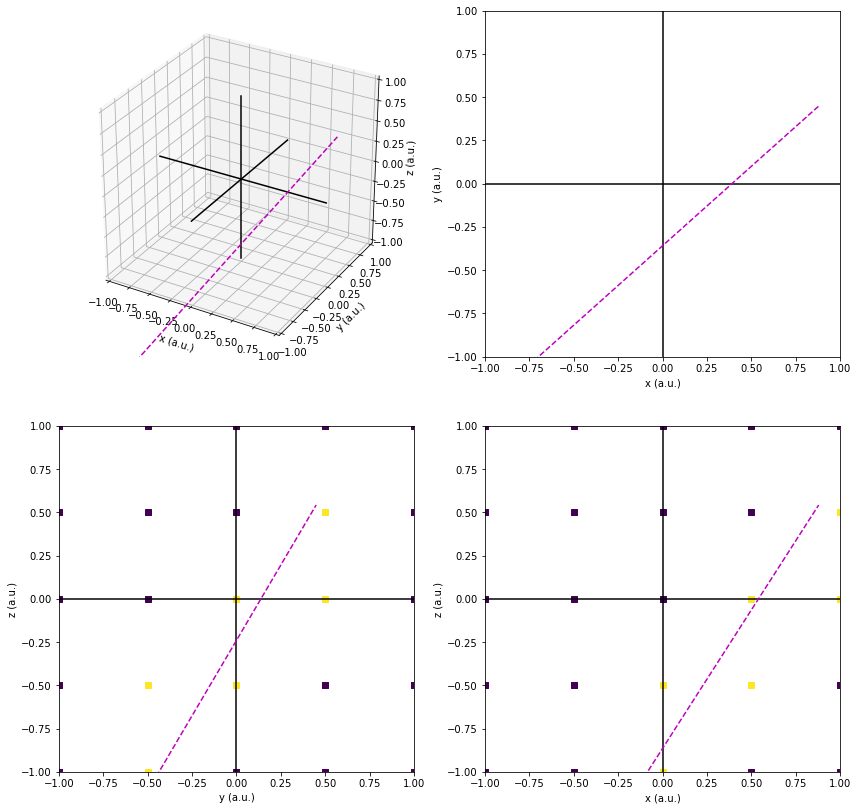

In [57]:
plot_event(random_offset=True)

#

0 -0.126077554095 0.126077554095
0 0.37588036763 -0.37588036763
0 1.96031079158 -1.96031079158
2.0 2.0



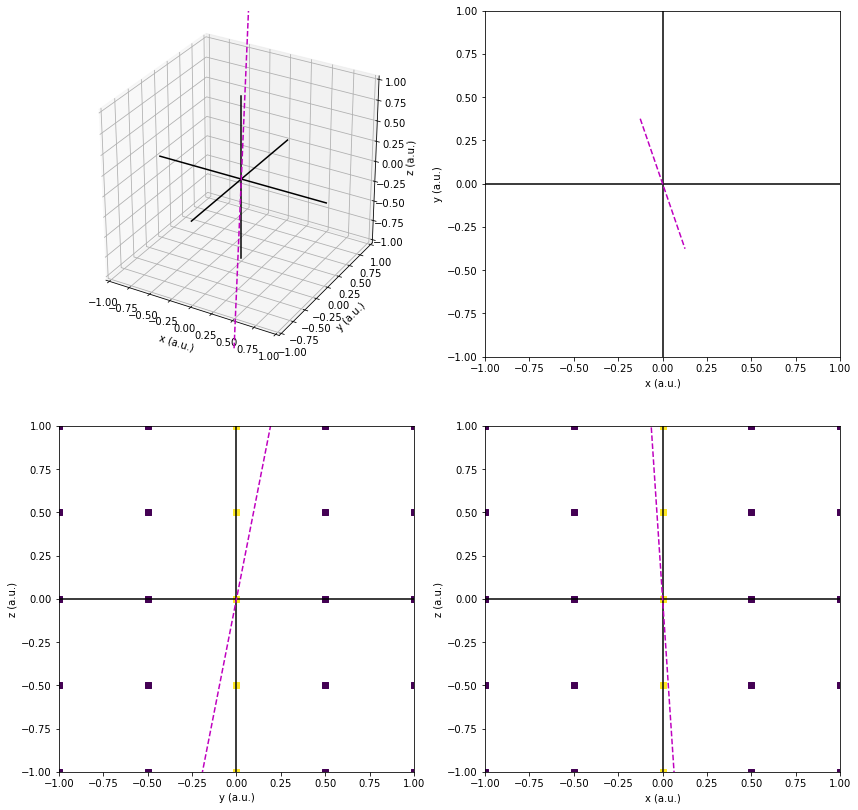

In [92]:
r      = 1
r2     = 2 * r
theta  = np.arccos(2*np.random.rand()-1)
phi    = 2*np.pi * np.random.rand()
nsipm  = 5
offset = False

xsipm, ysipm, zsipm = np.linspace(-r, r, nsipm), np.linspace(-r, r, nsipm), np.linspace(-r, r, nsipm)
xzsipm, yzsipm = np.meshgrid(xsipm, zsipm), np.meshgrid(ysipm, zsipm)

sipms = (np.linspace(-r, r, nsipm+1),
         np.linspace(-r, r, nsipm+1))


x0 = np.random.uniform(-r, r) if offset else 0
y0 = np.random.uniform(-r, r) if offset else 0
z0 = np.random.uniform(-r, r) if offset else 0

x1 = x0 + r2 * np.sin(theta) * np.cos(phi)
y1 = y0 + r2 * np.sin(theta) * np.sin(phi)
z1 = z0 + r2 * np.cos(theta)

theta = np.pi - theta
phi   = phi + np.pi#2*np.pi - phi

x2 = x0 + r2 * np.sin(theta) * np.cos(phi)
y2 = y0 + r2 * np.sin(theta) * np.sin(phi)
z2 = z0 + r2 * np.cos(theta)

print(x0, x1, x2)
print(y0, y1, y2)
print(z0, z1, z2)
print((x1**2+y1**2+z1**2)**0.5, (x2**2+y2**2+z2**2)**0.5)
x = np.linspace(x1, x2, 100)
y = np.linspace(y1, y2, 100)
z = np.linspace(z1, z2, 100)

xz = np.histogram2d(x, z, sipms)[0].astype(bool)
yz = np.histogram2d(y, z, sipms)[0].astype(bool)

axis = np.linspace(-r, r, 100)
zero = np.zeros_like(axis)

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(axis, zero, zero, "k-")
ax.plot(zero, axis, zero, "k-")
ax.plot(zero, zero, axis, "k-")
ax.plot(   x,    y,    z, "m--")
ax.set_xlabel("x (a.u.)")
ax.set_ylabel("y (a.u.)")
ax.set_zlabel("z (a.u.)")
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)
ax.set_zlim(-r,r)

ax = fig.add_subplot(2, 2, 2)
ax.plot(axis, zero, "k-")
ax.plot(zero, axis, "k-")
ax.plot(   x,    y, "m--")
ax.set_xlabel("x (a.u.)")
ax.set_ylabel("y (a.u.)")
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)

ax = fig.add_subplot(2, 2, 3)
ax.scatter(*yzsipm, c=yz.T, marker="s")
ax.plot(axis, zero, "k-")
ax.plot(zero, axis, "k-")
ax.plot(   y,    z, "m--")
ax.set_xlabel("y (a.u.)")
ax.set_ylabel("z (a.u.)")
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)

ax = fig.add_subplot(2, 2, 4)
ax.scatter(*xzsipm, c=xz.T, marker="s")
ax.plot(axis, zero, "k-")
ax.plot(zero, axis, "k-")
ax.plot(   x,    z, "m--")
ax.set_xlabel("x (a.u.)")
ax.set_ylabel("z (a.u.)")
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)

print()